# Classifying Heart Disease

With this project we'll attempt to classify if an individual has heart disease using the Heart Disease Dataset from UCI. This dataset originates from the Clevland Clinic, and it's columns are broken down below: 

`id`: Unique id for each patient

`age`: Age of the patient in years

`sex`: Male/Female

`cp`: chest pain type 
* 1 = typical angina 
* 2 = atypical angina 
* 3 = non-anginal 
* 4 = asymptomatic

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`chol`: serum cholesterol in mg/dl

`fbs`: if fasting blood sugar > 120 mg/dl

`restecg`: resting electrocardiographic results 
* 0 = normal
* 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: maximum heart rate achieved

`exang`: exercise-induced angina (True/ False)

`oldpeak`: ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment 
* 1 = upsloping 
* 2 = flat
* 3 = downsloping

`ca`: number of major vessels (0-3) colored by fluoroscopy

`thal`: Thallium Stress Test
* 3 = normal 
* 6 = fixed defect
* 7 = reversible defect

`present`: diagnosis of heart disease (the predicted attribute) 


## Overview

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#import dataset
hd = pd.read_csv('heart_disease.csv')

In [3]:
hd.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Based on the column descripton, it should be obvious that some of these features need to be converted into dummies if they are to be used in our model. Namely those columns which represent categorical variables: `cp`, `restecg`, `slope`, and `thal`. 

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [5]:
hd[['ca','thal']].value_counts()
#there are some question marks turning these columns into object dtypes

ca   thal
0.0  3.0     115
     7.0      51
1.0  7.0      32
     3.0      29
2.0  7.0      20
     3.0      14
3.0  7.0      12
0.0  6.0       8
3.0  3.0       6
1.0  6.0       4
2.0  6.0       4
0.0  ?         2
3.0  6.0       2
?    3.0       2
     7.0       2
dtype: int64

In [6]:
#need to fix ?'s -- just going to replace them with 0.0 and 3.0 respectively 

hd['ca'] = hd['ca'].replace('?', 0.0)
hd['thal'] = hd['thal'].replace('?', 3.0)

In [7]:
hd[['ca','thal']].value_counts()

ca   thal
0.0  3.0     115
     7.0      51
1.0  7.0      32
     3.0      29
2.0  7.0      20
     3.0      14
3.0  7.0      12
0.0  6.0       8
3.0  3.0       6
1.0  6.0       4
2.0  6.0       4
0.0  3.0       2
     7.0       2
     3.0       2
3.0  6.0       2
dtype: int64

In [8]:
#convert cols to int 

hd['ca'] = hd['ca'].astype(float).astype(int)
hd['thal'] = hd['thal'].astype(float).astype(int)

hd[['ca','thal']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ca      303 non-null    int64
 1   thal    303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


We can now convert the relevant categorical columns into dummy variables for use in the model. 

In [9]:
cate = ['cp', 'restecg', 'slope', 'thal']

hd = pd.get_dummies(hd, columns=cate)

hd.head()

,Unnamed: 0,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,1,63,1,145,233,1,150,0,2.3,0,...,0,0,0,1,0,0,1,0,1,0
1,2,67,1,160,286,0,108,1,1.5,3,...,1,0,0,1,0,1,0,1,0,0
2,3,67,1,120,229,0,129,1,2.6,2,...,1,0,0,1,0,1,0,0,0,1
3,4,37,1,130,250,0,187,0,3.5,0,...,0,1,0,0,0,0,1,1,0,0
4,5,41,0,130,204,0,172,0,1.4,0,...,0,0,0,1,1,0,0,1,0,0


In [10]:
#need to drop one of each to satisfy multicollinearity assump 

hd.drop(['cp_4', 'restecg_2', 'slope_3', 'thal_7'], axis=1, inplace=True)

Our data appears to be ready to move on to the next stage... feature selection.

## Feature Selection

We are building a single-class classification model based on the `present` column. Let's have a look at some of the potential predictors, and how they relate to our chosen outcome variable.

<Axes: >

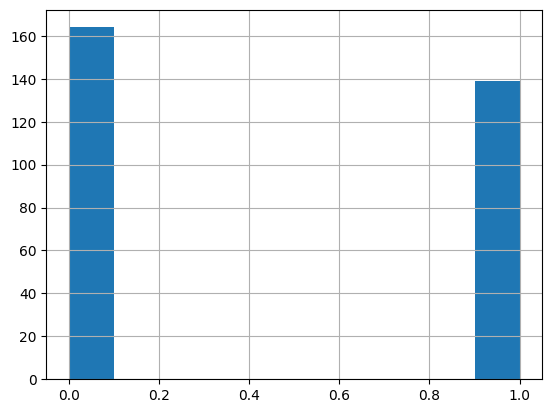

In [11]:
#have a look at outcome 

hd['present'].hist()

The counts for cases and non-cases are similar. 

Because we don't have many features, we are going to test them all and see which combination works best. To do so we will use Recursive Feature Elimination (RFE), that trains a model on a subset of the features and recursivley considers increasingly smaller sets of features. 

The above method is a more economical means of selecting features given the presence of both categorical (ordinal and non-ordinal), and quantitative predictors in our data. If instead we wished to take a filter approach, we'd have to calculate multiple statistical tests given the nature of the features 

Example statistical tests for comparing variables of different kind: 

* ANOVA: one categorical variable one continuous variable
* CHI-Squared: two categorical variables
* Pearsons-r: two continuous variables (works with categorical variables that are numerical and ordinal)

See: https://medium.com/@rithpansanga/logistic-regression-for-feature-selection-selecting-the-right-features-for-your-model-410ca093c5e0

## Building The Model

It's now time to construct our model. Before we do, it's worth noting that we are not going to proceed by scaling out data. Like with linear regression, feature scaling is not strictly required as neither algorithm relies on distance (unlike models such as KNN). However, when employing optimization algorithms like gradient descent, feature scaling can increase the time to convergence of the model, ultimatley reducing compute. 

See:

https://forecastegy.com/posts/does-logistic-regression-require-feature-scaling/#:~:text=To%20put%20it%20simply%2C%20feature,applied%20uniformly%20across%20all%20features.

https://forecastegy.com/posts/does-linear-regression-require-feature-scaling/#:~:text=In%20linear%20regression%2C%20feature%20scaling,convergence%20and%20improve%20model%20performance.

In [12]:
#split the data

X = hd.drop('present', axis=1)
y = hd['present']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=734)

In [13]:
#check y_train and y_test for cases and non cases

print('y_train split:')
print(y_train.value_counts(normalize=True))

print('\n')

print('y_test split:')
print(y_test.value_counts(normalize=True))

#looks good

y_train split:
0    0.545455
1    0.454545
Name: present, dtype: float64


y_test split:
0    0.52459
1    0.47541
Name: present, dtype: float64


In [14]:
from sklearn.feature_selection import RFE

#building model 
model = LogisticRegression()

#instantiating object of class RFE so we can feature select 
rfe = RFE(model, n_features_to_select=5)

#fitting to training data
rfe.fit(X_train, y_train)

#getting top features
top_feats = rfe.support_

/home/mistaj/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mistaj/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [15]:
#checking top features
final_feats = X_train.columns[top_feats].values

#printing
print(f'Best Features:') 
print(*final_feats, sep=', ')

Best Features:
exang, ca, cp_1, slope_2, thal_3


Using RFE, the 5 most worthwhile features are:

`exang`, `ca`, `cp_1`, `slope_2`, `thal_7`

Lets build a model and calculate some performance metrics.

In [16]:
#constructing model
final_model = LogisticRegression()

#constraining training and testing data
X_train_final = X_train[final_feats]
X_test_final = X_test[final_feats]

#fitting to training data
final_model.fit(X_train_final, y_train)

#getting predictions
y_pred_train = final_model.predict(X_train_final)

#grabbing metrics

train_accuracy = final_model.score(X_train_final, y_train)
print(f'Training Accuracy: {train_accuracy.round(4)}')

Training Accuracy: 0.8347


Sensitivity: 0.7727
Specificity: 0.8864


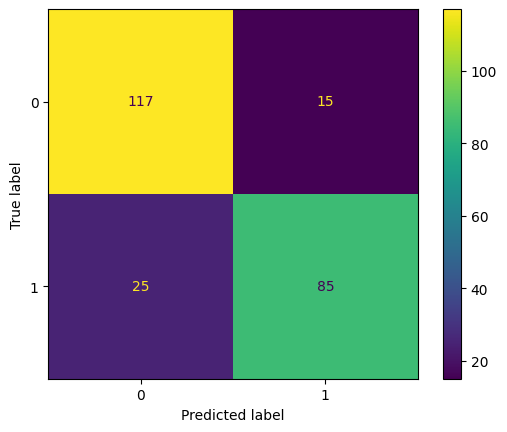

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#creating confusion matrix for training data 
cm_train = confusion_matrix(y_train, y_pred_train, labels=final_model.classes_) #matrix

cm_train_vis = ConfusionMatrixDisplay(cm_train, display_labels=final_model.classes_) #matrix viz
cm_train_vis.plot()

#calculating sensitivity and specificity from cm_train

tp = cm_train[1,1]
fn = cm_train[1,0]
tn = cm_train[0,0]
fp = cm_train[0,1]

sens_train = tp / (tp+fn)
print(f'Sensitivity: {sens_train.round(4)}')

spec_train = tn / (tn+fp)
print(f'Specificity: {spec_train.round(4)}')

### A Brief Discussion on Binary Classification Metrics

<br>

Below is a quick run-down of the performance metrics calculated from the training set: 


**Accuracy**: This is the percentage of the total observations that were correctly predicted

**Sensitivity / Recall**: This is the percentage of cases (class = 1) that were correctly predicted

$$
\frac{\text{# correctly predicted cases}}{\text{# total cases}} = 
\frac{\text{# correctly predicted subjects with heart disease}}{\text{# subjects in dataset with heart disease}}
$$

**Specificity**: This is the percentage of non-cases (class = 0) that were correctly predicted

$$
\frac{\text{# correctly predicted non-cases}}{\text{# total non-cases}} =
\frac{\text{# correctly predicted subjects without heart disease}}{\text{# subjects in dataset without heart disease}}
$$

We can also aknowledge another metric that, for simplicity's sake, we are not calculating, but is still important:

**Precision**: This is the number of predicted cases that were correct

$$
\frac{\text{# correctly predicted cases}}{\text{# total predictions made for cases}} = 
\frac{\text{# correctly predicted subjects with heart disease}}{\text{# subjects predicted to have heart disease}}
$$

### Training Evaluation

This model appears to perform better for non-cases than it does cases. This is not preferable as it means the model is worse at limiting the amount of false negatives than it is false positives. False negatives represent a situation where a person has been told they don't have heart disease when, in fact, they do. 

However, it is important to keep in mind that these results are based on our training data, which is overly optimistic. Let's move on to checking the model coefficients. 


In [18]:
#get coefs
coefs = final_model.coef_

#get log odds ratio

print('Log Odds-Ratio:')
for i in range(5):
    
    coef = coefs[0][i]
    name = final_feats[i]
    
    
    print(name, ':', coef.round(4))

    
print('\n')

#get odds ratio 

print('Odds-Ratio:')
for i in range(5):
    
    coef = coefs[0][i]
    name = final_feats[i]
    
    odds_rat = np.exp(coef)
    
    print(name, ':', odds_rat.round(4))
    
my_label = 1 


Log Odds-Ratio:
exang : 1.4112
ca : 1.0185
cp_1 : -0.9017
slope_2 : 1.1399
thal_3 : -1.7676


Odds-Ratio:
exang : 4.1007
ca : 2.7691
cp_1 : 0.4059
slope_2 : 3.1264
thal_3 : 0.1707


<br>

Looking at the above coefficients it's important to keep in mind that they represent the log odds-ratio for a unit increase in the given predictor, holding all other predictors constant. Consider the below example for the `ca` feature: 

> For a 1 unit change in `ca`, the log odds ratio changes by 1.02, holding all other predictors constant.  

<br>

To get the odds ratio, we raise e to each coefficient. First, recall that the odds ratio represents the following:


1. let $O_0$ be the odds that our outcome is a non-case (i.e. class = 0) 

2. let $O_1$ be the odds that our coutcome is a case (i.e. class = 1) 

<br>

Recall that odds represent the ratio of a successful outcome, $EY$, to an unsuccessful outcome:

$$\frac{EY}{1-EY}$$ 

<br>

The odds ratio is simply the fraction of the two odds: 

$$
\frac{O_0}{O_1}
$$

<br>

Consider two instances: 

1. The odds ratio is > 1
- this means that the odds that the outcome is a case (class = 1) are greater than 1 
       
2. The odds ratio is < 1 
- this means that the odds that the outcome is a non-case (class = 0) are greater than 1

<br>

Let's now consider the odds ratio for discrete-numerical feature `ca`, or, more correctly, ${e}^{\beta_{ca}}$:

> Changing the predictor by 1 unit changed the odds ratio by ${e}^{\beta_{ca}}$, or, 2.79, holding all other predictors constant. 


<br>

For a predictor represented by a dummy variable, like `cp_1`, the coefficient takes on a different meaning. Generally speaking, a dummy coefficient represents the odds ratio associated with the given dummy as compared to the control condition (i.e. the omitted dummy). 

> In the case of `cp_1`, the odds-ratio of .40 indicates the factor of the odds of having heart disease in category `cp_1` v.s. the odds of having heart disease within the reference category, `cp_4`. In other words, the odds ratio of .40 for category `cp_1`, means that having heart disease is less likely, .40 times as high, for this group than the refrence group. 

`cp` denotes chest pain type, `cp_1` represents one category from the 4 possible levels recorded by the researchers. 

`cp_1` : typical angina 

`cp_4` : asymptomatic



## Assumptions

Before we finally evaluate the model, for the sake of completeness, it would be beneficial for us to aknowledge that, in the case of a formal analysis, an assumption check is required to establish the applicability of the underlying model to the data. 

The assumptions for Logistic Regression are as follows:

1. Outcome Structure: Binary logistic regression requires the outcome variable be binary 
2. Observation Independence: The observations in the data must be independent of each other. 
3. No Multicollinearity: There should not exist strong correlative relationships among our predictors.
4. Linearity of Independent Variables and Log Odds: The independent variables must have a linear relationship with the log odds. 
5. Large Sample Size

## Final Evaluation

It's now time to evaluate our model on the testing data. We have a general idea of how the model performs on the training data, but those results are not reflective of reality. 

In [19]:
#predict on the test set
y_pred_test = final_model.predict(X_test_final)

#evaluate predictions

test_accuracy = final_model.score(X_test_final, y_test)
print(f'Accuracy: {test_accuracy.round(4)}')

Accuracy: 0.8197


Sensitivity: 0.7241
Specificity: 0.9062


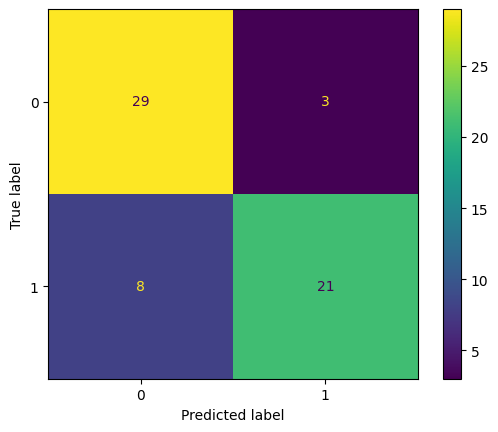

In [20]:
#creating confusion matrix for testing data 
cm_test = confusion_matrix(y_test, y_pred_test, labels=final_model.classes_) #matrix

cm_train_vis = ConfusionMatrixDisplay(cm_test, display_labels=final_model.classes_) #matrix viz
cm_train_vis.plot()

#calculating sensitivity and specificity from cm_test

tp = cm_test[1,1]
fn = cm_test[1,0]
tn = cm_test[0,0]
fp = cm_test[0,1]

sens_test = tp / (tp+fn)
print(f'Sensitivity: {sens_test.round(4)}')

spec_test = tn / (tn+fp)
print(f'Specificity: {spec_test.round(4)}')

The accuracy and sensitivity are both lower for the testing data as opposed to the training data. However, specificity returned a higher value after being evaluated on the testing data. Consequently, the model's superior predictive performance for non-cases is more evident after being evaluated on the testing data. 

## Applications

Post our final evaluation on the training data, it's now time to consider the utility of this model.

Being that the model predicts non-cases better, alot better, than cases, this model has a glaring problem in the form of false negatives. While, after evaluation on the testing data, 90% of non-cases were correctly identified, the same could be said of only 72% of cases. Contextually, this means that not enough people with heart disease are being correctly identified. In other words, there exist too many individuals for which the model states they do not have heart disease when, in actuality, they do. From a clinical perspective, it's pretty obvious to see why this presents a problem -- the affected group is not going to be prioritized for treatment. 

As such, the fairly decent accuracy figure post-evaluation on the testing data does not tell the whole story. 

To fix this model we could try a few things: 
* getting more data
* hyperparameter tuning
* choosing different features (or perhaps a different method for selecting features)
* splitting the training and testing sets up differently